<a href="https://colab.research.google.com/github/aml7hawaiiedu/Testing_Playground/blob/main/TenserFlowin100seconds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The "TensorFlow in 100 Seconds" video by Fireship is a quick overview of TensorFlow, a popular open-source machine learning framework developed by Google.

In the video, the host explains that TensorFlow is based on the concept of a "tensor," which is a mathematical object that can represent data in a multi-dimensional array. Tensors can be used to represent many types of data, including images, audio, and text.

The host goes on to explain that TensorFlow provides a high-level API that makes it easy to build and train machine learning models. TensorFlow also includes a wide range of pre-built models, such as image recognition models and language translation models, that can be used out of the box or fine-tuned for specific use cases.

The host also touches on some of the key features of TensorFlow, including its support for distributed training, which allows models to be trained across multiple machines, and its integration with other popular machine learning tools, such as Keras and PyTorch.

Overall, the video provides a brief but informative introduction to TensorFlow, highlighting some of its key features and capabilities.

- Used in medicine to object detection in MRI images
- Used by Twitter to sort timeline by tweet relevance
- Used by Spotify to recommend music
- Used by PayPal for freaud detection

In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
print(tf.__version__)

2.12.0


In [4]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [6]:
train_images.shape


(60000, 28, 28)

In [7]:
len(train_labels)

60000

In [8]:
train_labels


array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [9]:
test_images.shape

(10000, 28, 28)

In [10]:
len(test_labels)

10000

**Preprocess** 
The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

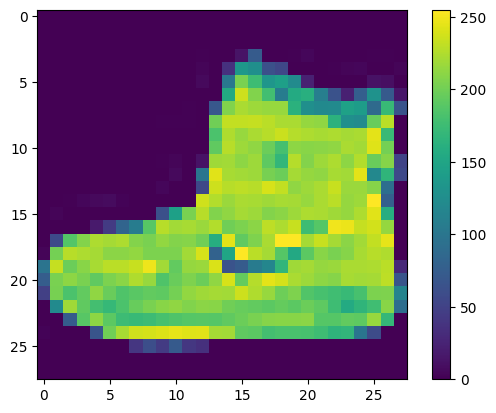

In [11]:
# inspect the data.
# this looks at the first (0) image in the train set.
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [12]:
# scale the values to range from 0 to 1 before fedding into the model.
train_images = train_images/255
test_images = test_images/255

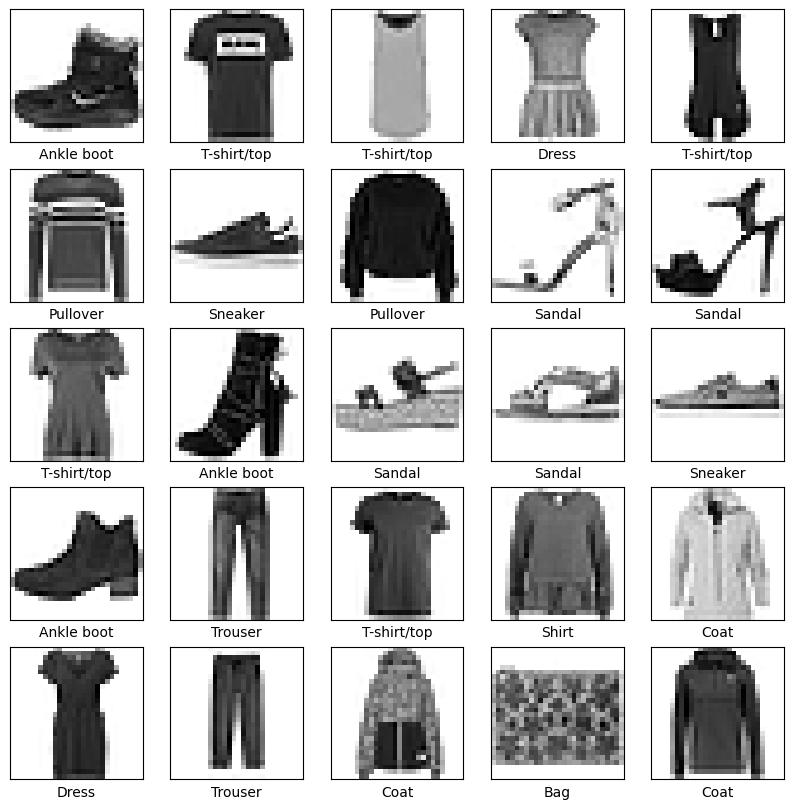

In [13]:
# verify the data is in the correct format.
# this displays the first 25 images from the train set.
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [16]:
# chaining together simple layers. 
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), # transform the image format from 2D arry (28 by 28) to a 1D array (28 by 28 = 784 pixels). this is just reformating.
    tf.keras.layers.Dense(128, activation='relu'), # first dense layer has 128 nodes (neurons).
    tf.keras.layers.Dense(10) # second dense layer returns a logits array with a length of 10. 
])

In [18]:
# compile the model.
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=['accuracy'])

In [19]:
# train the model.
model.fit(train_images, train_labels, epochs=10)


Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4953 - accuracy: 0.8266
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3720 - accuracy: 0.8670
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3337 - accuracy: 0.8789
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3108 - accuracy: 0.8850
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2949 - accuracy: 0.8904
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2798 - accuracy: 0.8954
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2674 - accuracy: 0.9009
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2579 - accuracy: 0.9031
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2472 - accuracy: 0.9075
Epoch 10/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.

In [24]:
model

In [21]:
# evaluate the model accuracy.
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3263 - accuracy: 0.8853 - 1s/epoch - 4ms/step

Test accuracy: 0.8852999806404114


In [25]:
# the model is now trained. now you can make predictions about some images.
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [26]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [27]:
predictions [0]

array([6.8899459e-07, 5.1245568e-08, 3.2528265e-09, 2.7741694e-07,
       1.2230483e-09, 7.9587026e-04, 7.5387590e-07, 5.9872828e-02,
       8.8333258e-07, 9.3932855e-01], dtype=float32)

In [28]:
np.argmax(predictions[0])

9

In [29]:
test_labels[0]

9

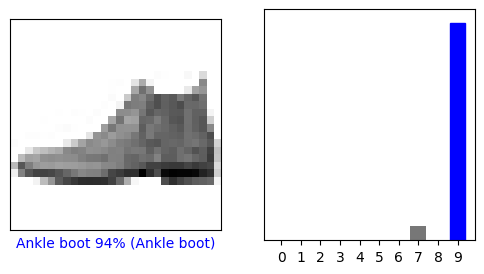

In [31]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

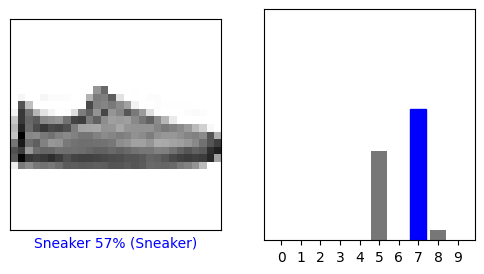

In [32]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

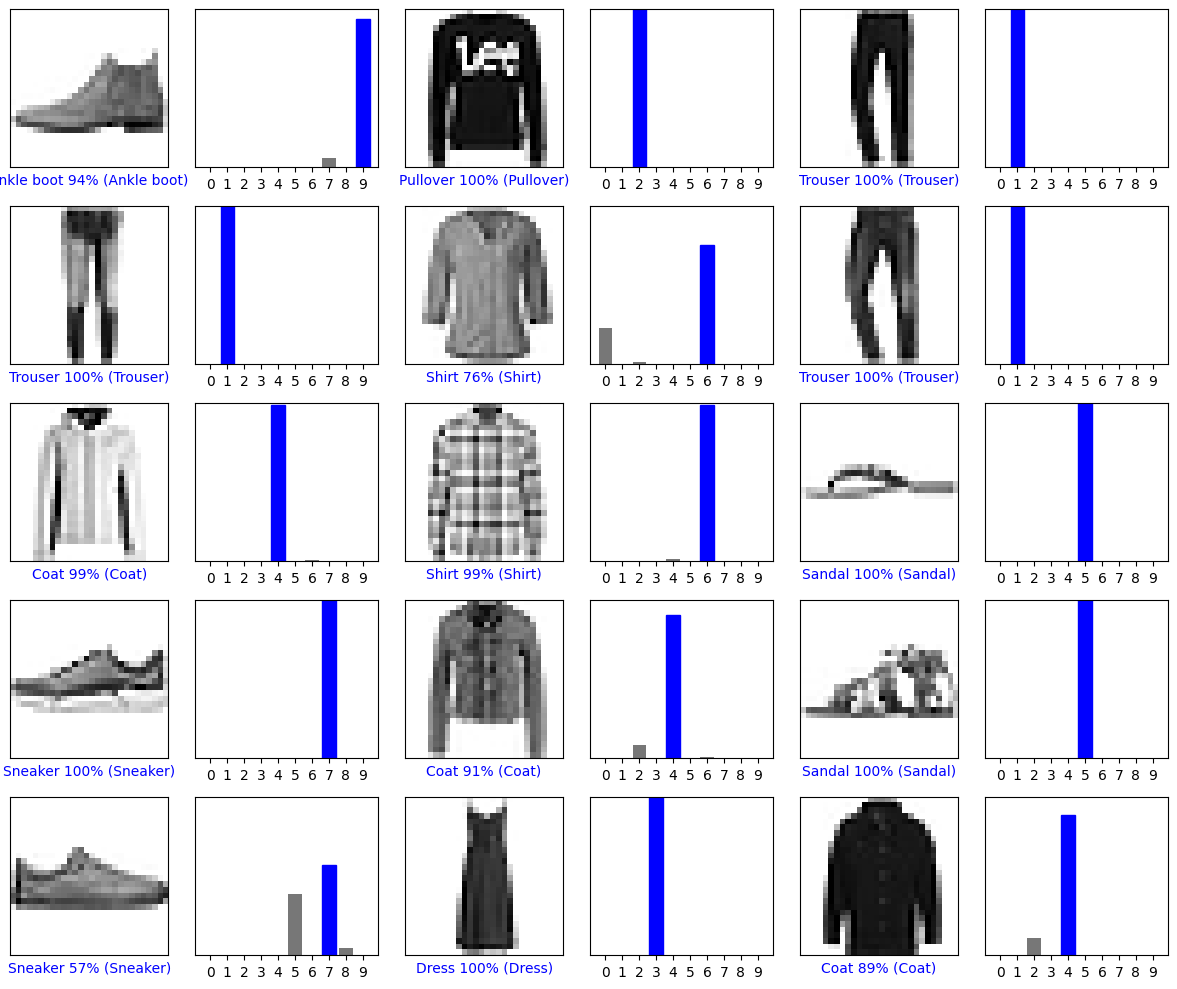

In [33]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [34]:
# use the trained model

# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [35]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [36]:
# predict the correct label for this image:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 30ms/step
[[3.3566041e-05 1.0214966e-09 9.9936563e-01 1.8110938e-09 4.4698635e-04
  1.5885899e-16 1.5379919e-04 1.5259308e-18 3.0022704e-09 1.5788838e-13]]


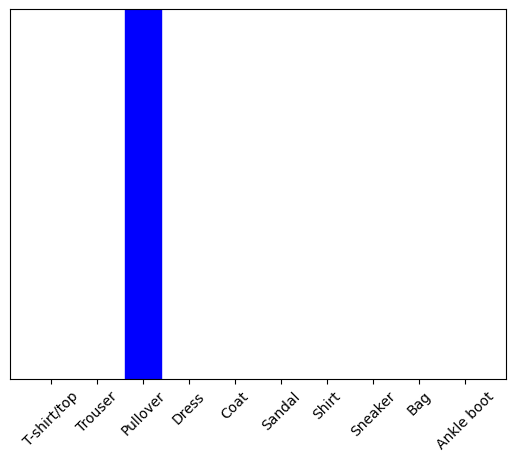

In [37]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [38]:
np.argmax(predictions_single[0])

2